In [1]:
%pylab inline
from sklearn import neighbors
from matplotlib.colors import ListedColormap

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Parameters for generated data.
blue_mean = [1, 0]
orange_mean = [0, 1]
cov_matrix = [[1, 0], [0, 1]]

In [3]:
# Generates training set.
training_blue_x, training_blue_y = random.multivariate_normal(blue_mean, cov_matrix, 100).T
training_blue_points = column_stack((training_blue_x, training_blue_y))

training_orange_x, training_orange_y = random.multivariate_normal(orange_mean, cov_matrix, 100).T
training_orange_points = column_stack((training_orange_x, training_orange_y))

training_points = concatenate((training_blue_points, training_orange_points))

# Generates test set.
test_blue_x, test_blue_y = random.multivariate_normal(blue_mean, cov_matrix, 5000).T
test_blue_points = column_stack((test_blue_x, test_blue_y))
                                
test_orange_x, test_orange_y = random.multivariate_normal(orange_mean, cov_matrix, 5000).T
test_orange_points = column_stack((test_orange_x, test_orange_y)) 
                                  
test_points = concatenate((test_blue_points, test_orange_points))

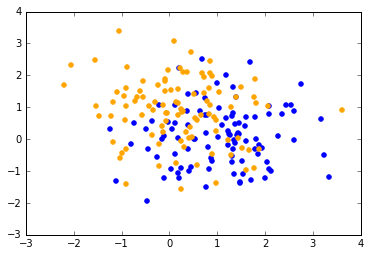

In [4]:
# Plots training set.
scatter(training_blue_x, training_blue_y, color='blue')
scatter(training_orange_x, training_orange_y, color='orange')

In [5]:
# Generates output labels.
training_labels = concatenate(
    (['blue' for x in range(len(training_blue_x))], ['orange' for x in range(len(training_orange_x))]))
training_num_labels = concatenate(
    ([0 for x in range(len(training_blue_x))], [1 for x in range(len(training_orange_x))]))

test_labels = concatenate(
    (['blue' for x in range(len(test_blue_x))], ['orange' for x in range(len(test_orange_x))]))
test_num_labels = concatenate(
    ([0 for x in range(len(test_blue_x))], [1 for x in range(len(test_orange_x))]))

In [6]:
# Uses a KNeighborsClassifier classifier with 15 neighbors.
n_neighbors = 15
knc15 = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform") 
knc15_model = knc15.fit(training_points, training_num_labels)

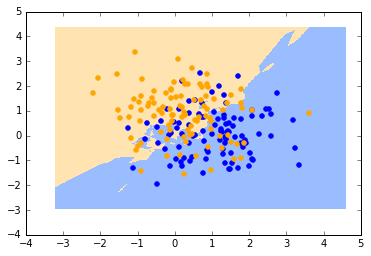

In [7]:
# Plots results of the KNeighborsClassifier classifier with 15 neighbors.

# Plots color regions for the predictions.
h = .02
cmap_light = ListedColormap(['#99bdff', '#ffe4b2'])

x_min, x_max = training_points[:, 0].min() - 1, training_points[:, 0].max() + 1
y_min, y_max = training_points[:, 1].min() - 1, training_points[:, 1].max() + 1
xx, yy = np.meshgrid(arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knc15_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plots training set.
scatter(training_blue_x, training_blue_y, color='blue')
scatter(training_orange_x, training_orange_y, color='orange')

In [8]:
# Calculates error for the KNeighborsClassifier classifier with 15 neighbors.

#For the training set.
pred_labels = knc15_model.predict(training_blue_points)
wrong_blue = sum([x != 0 for x in pred_labels])

pred_labels = knc15_model.predict(training_orange_points)
wrong_orange = sum([x != 1 for x in pred_labels])

training_error = (wrong_blue+wrong_orange)/(len(training_blue_points)+len(training_orange_points))
print('Training Error: {0:.2f}%'.format(training_error*100))

#For the test set.
pred_labels = knc15_model.predict(test_blue_points)
wrong_blue = sum([x != 0 for x in pred_labels])

pred_labels = knc15_model.predict(test_orange_points)
wrong_orange = sum([x != 1 for x in pred_labels])

test_error = (wrong_blue+wrong_orange)/(len(test_blue_points)+len(test_orange_points))
print('Test Error: {0:.2f}%'.format(test_error*100))

Training Error: 28.00%
Test Error: 25.93%


In [9]:
# Uses a KNeighborsClassifier classifier with 1 neighbor.
n_neighbors = 1
knc1 = neighbors.KNeighborsClassifier(n_neighbors, weights="uniform") 
knc1_model = knc1.fit(training_points, training_num_labels)

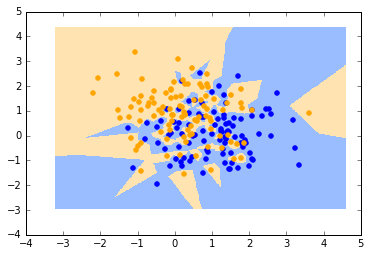

In [10]:
# Plots results of the KNeighborsClassifier classifier with 15 neighbors.

# Plots color regions for the predictions.
h = .02
cmap_light = ListedColormap(['#99bdff', '#ffe4b2'])

x_min, x_max = training_points[:, 0].min() - 1, training_points[:, 0].max() + 1
y_min, y_max = training_points[:, 1].min() - 1, training_points[:, 1].max() + 1
xx, yy = np.meshgrid(arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = knc1_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plots training set.
scatter(training_blue_x, training_blue_y, color='blue')
scatter(training_orange_x, training_orange_y, color='orange')

In [11]:
# Calculates error for the KNeighborsClassifier classifier with 15 neighbors.

#For the training set.
pred_labels = knc1_model.predict(training_blue_points)
wrong_blue = sum([x != 0 for x in pred_labels])

pred_labels = knc1_model.predict(training_orange_points)
wrong_orange = sum([x != 1 for x in pred_labels])

training_error = (wrong_blue+wrong_orange)/(len(training_blue_points)+len(training_orange_points))
print('Training Error: {0:.2f}%'.format(training_error*100))

#For the test set.
pred_labels = knc1_model.predict(test_blue_points)
wrong_blue = sum([x != 0 for x in pred_labels])

pred_labels = knc1_model.predict(test_orange_points)
wrong_orange = sum([x != 1 for x in pred_labels])

test_error = (wrong_blue+wrong_orange)/(len(test_blue_points)+len(test_orange_points))
print('Test Error: {0:.2f}%'.format(test_error*100))

Training Error: 0.00%
Test Error: 34.39%
